# SwarmPRM  + Time

In [1]:
%matplotlib inline

## Road Map tests


#### Import and setup

In [2]:
import glob
from matplotlib import pyplot as plt
import numpy as np

from swarm_prm.envs.map import MapLoader
from swarm_prm.envs.instance import Instance
from swarm_prm.solvers.macro.gaussian_prm.gaussian_utils import GaussianGraphNode
from swarm_prm.solvers.macro.gaussian_prm.gaussian_prm import GaussianPRM


### Visualizing Maps

In [3]:
map_dir = "data/envs/maps/*"

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

# Visualize the first 10 maps
for idx, map_fname in enumerate(glob.glob(map_dir)[:10]):
    row = idx // 5
    col = idx % 5
    map_loader = MapLoader(map_fname)
    map = map_loader.get_map()
    map.visualize(ax=axs[row][col])

### Curated example

In [5]:
### PARAMETERS ###

# Map config
map_fname = "../data/envs/maps/map_7.yaml"
map_loader = MapLoader(map_fname)
map = map_loader.get_map()
num_samples = 500 # number of sample points

# Agent config
num_agent = 10
agent_radius = 1
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 10], [10, 30], [10, 50]])
goals = np.array([[90, 42], [90, 60], [90, 80], [90, 24]])

starts_weight = np.array([0.3, 0.4, 0.3])
goals_weight = np.array([0.1, 0.2, 0.4, 0.3])

g_starts = [GaussianGraphNode(start, np.identity(2)*10) for start in starts]
g_goals = [GaussianGraphNode(goal, np.identity(2)*10) for goal in goals]

instance = Instance(map, g_starts, g_goals, starts_weight, goals_weight, num_agent)
instance.visualize()



(<Figure size 640x480 with 1 Axes>, <Axes: >)

#### Sampling Roadmap



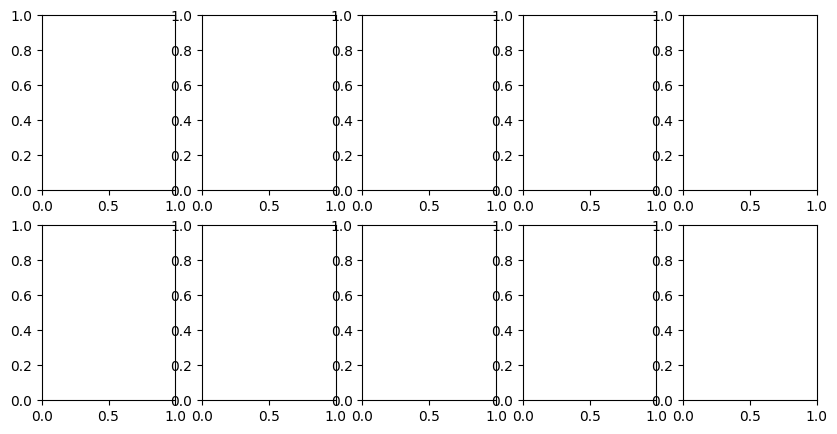

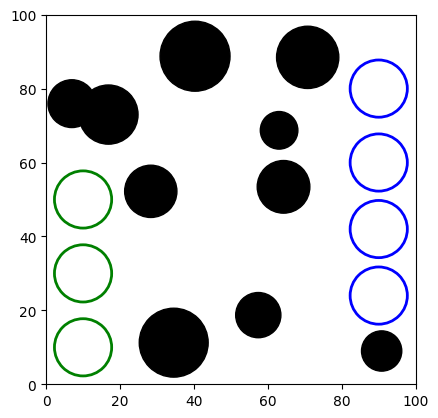

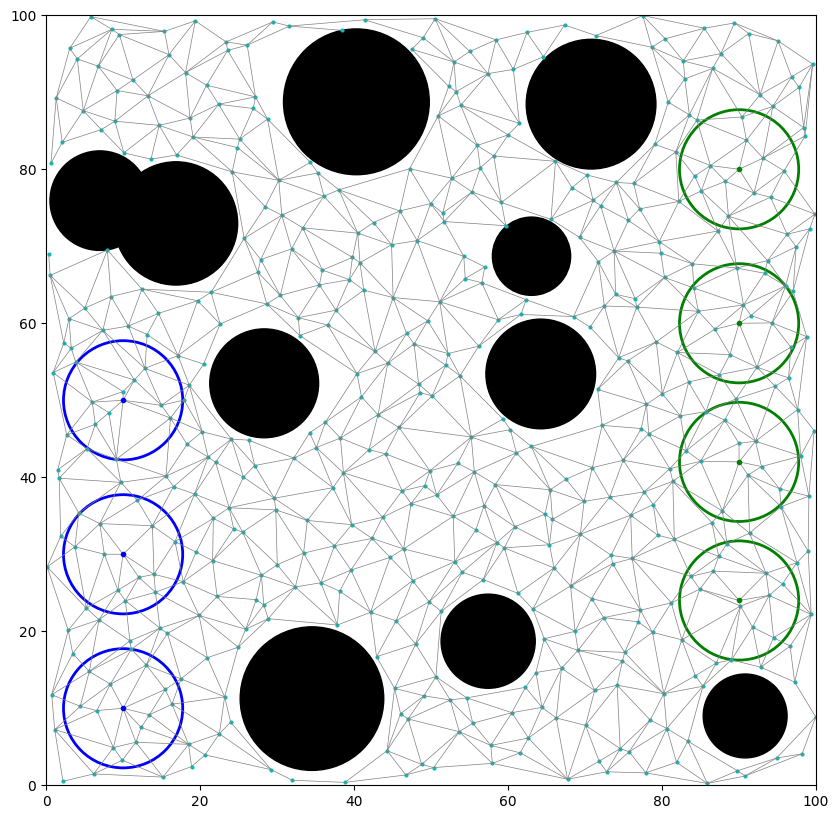

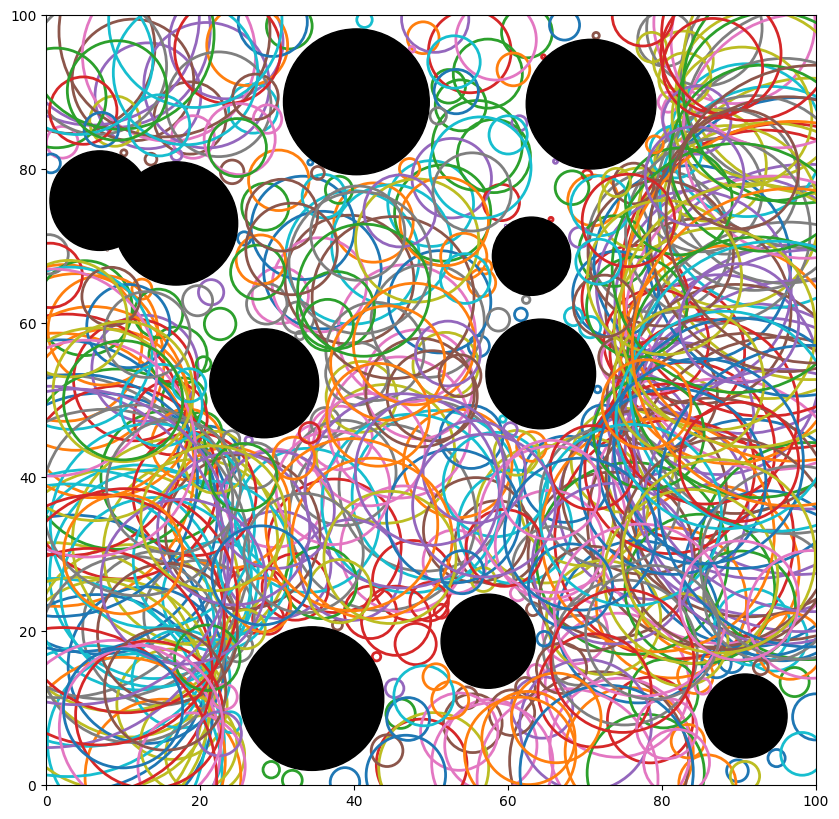

In [6]:
# Swarm PRM sampling method
if sampling_method == "SWARMPRM_SAMPLING":
    gaussian_prm = GaussianPRM(instance, num_samples)
    gaussian_prm.sample_free_space(sampling_strategy="SWARMPRM")
    gaussian_prm.load_instance()
    gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
    gaussian_prm.visualize_roadmap("test_map")
    gaussian_prm.visualize_g_nodes("test_g_nodes")

# Gaussian distribution with unit covariance 
elif sampling_method == "GAUSSIAN_SAMPLING":
    gaussian_prm = GaussianPRM(instance, num_samples)
    gaussian_prm.sample_free_space(sampling_strategy="UNIFORM_HALTON")
    gaussian_prm.load_instance()
    gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
    gaussian_prm.visualize_roadmap("test_map")
    gaussian_prm.visualize_g_nodes("test_g_nodes")




### TEG 

In [13]:
from swarm_prm.solvers.macro.teg_nx.teg_nx import TEGGraph_NX

teg_graph= TEGGraph_NX(gaussian_prm, agent_radius, target_flow=num_agent)
max_flow, flow_dict, timestep, teg = teg_graph.find_earliest_timestep()
print("max flow", max_flow)
print("timestep", timestep)
print("flow_dict", flow_dict)
assert max_flow is not None, "Unable to find solution within the given timesteps"


timestep: 0 max_flow: 0
timestep: 1 max_flow: 0
timestep: 2 max_flow: 0
timestep: 3 max_flow: 0
timestep: 4 max_flow: 0
timestep: 5 max_flow: 0
timestep: 6 max_flow: 0
timestep: 7 max_flow: 0
timestep: 8 max_flow: 0
timestep: 9 max_flow: 0
timestep: 10 max_flow: 0
timestep: 11 max_flow: 0
timestep: 12 max_flow: 0
timestep: 13 max_flow: 0
timestep: 14 max_flow: 0
timestep: 15 max_flow: 0
timestep: 16 max_flow: 4
timestep: 17 max_flow: 4
timestep: 18 max_flow: 6
timestep: 19 max_flow: 9
timestep: 20 max_flow: 9
timestep: 21 max_flow: 9
timestep: 22 max_flow: 10
max flow 10
timestep 22
flow_dict {'VS': {'0_0': 0, '1_0': 0, '2_0': 0, '3_0': 0, '4_0': 0, '5_0': 0, '6_0': 0, '7_0': 0, '8_0': 0, '9_0': 0, '10_0': 0, '11_0': 0, '12_0': 0, '13_0': 0, '14_0': 0, '15_0': 0, '16_0': 0, '17_0': 0, '18_0': 0, '19_0': 0, '20_0': 0, '21_0': 0, '22_0': 0, '23_0': 0, '24_0': 0, '25_0': 0, '26_0': 0, '27_0': 0, '28_0': 0, '29_0': 0, '30_0': 0, '31_0': 0, '32_0': 0, '33_0': 0, '34_0': 0, '35_0': 0, '36_0'

In [14]:
# gaussian_prm.visualize_solution(flow_dict, timestep, num_agent)
simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)

In [15]:
# gaussian_prm.animate_solution(flow_dict, timestep, num_agent)

### APF Test

In [16]:
from swarm_prm.solvers.micro.apf_single_step import APFSingleStepSolver
apf_solver = APFSingleStepSolver(map, simple_paths, agent_radius, timestep)
simple_paths, gaussian_paths = apf_solver.get_solution()

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'